<a href="https://colab.research.google.com/github/221805/ACE-Targeted-Drug-Discovery/blob/main/Angiotensin_converting_enzyme_part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comparing Regressors**


## **1. Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## **2. Load the data set**


In [3]:
! wget https://raw.githubusercontent.com/221805/Bioactivity-Data/refs/heads/main/ACE_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2024-11-29 16:02:34--  https://raw.githubusercontent.com/221805/Bioactivity-Data/refs/heads/main/ACE_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 503 between bytes timeout
2024-11-29 16:02:52 ERROR 503: between bytes timeout.



In [5]:
df = pd.read_csv('ACE_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [6]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [7]:
# Examine X dimension
X.shape

(708, 881)

In [9]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(708, 78)

In [10]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [11]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:14<00:00,  2.91it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 566, number of used features: 78
[LightGBM] [Info] Start training from score 6.197661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 42/42 [00:09<00:00,  4.46it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 566, number of used features: 78
[LightGBM] [Info] Start training from score 6.197661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [12]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.76,0.80,0.86,0.31
ExtraTreesRegressor,0.76,0.80,0.86,0.93
ExtraTreeRegressor,0.76,0.80,0.86,0.03
DecisionTreeRegressor,0.76,0.80,0.86,0.06
XGBRegressor,0.76,0.80,0.86,0.20
RandomForestRegressor,0.70,0.74,0.97,0.59
BaggingRegressor,0.67,0.72,1.01,0.08
LGBMRegressor,0.55,0.61,1.18,0.16
HistGradientBoostingRegressor,0.55,0.61,1.19,1.43


In [13]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,-0.57,0.30,1.62,0.47
GradientBoostingRegressor,-0.58,0.30,1.62,0.38
SVR,-0.58,0.29,1.62,0.08
LGBMRegressor,-0.59,0.29,1.63,0.11
NuSVR,-0.62,0.28,1.64,0.07
RandomForestRegressor,-0.69,0.24,1.68,0.60
LassoLarsIC,-0.71,0.24,1.69,0.06
LassoLarsCV,-0.71,0.24,1.69,0.08
MLPRegressor,-0.72,0.23,1.69,0.83


## **5. Data visualization of model performance**

[(0.0, 1.0)]

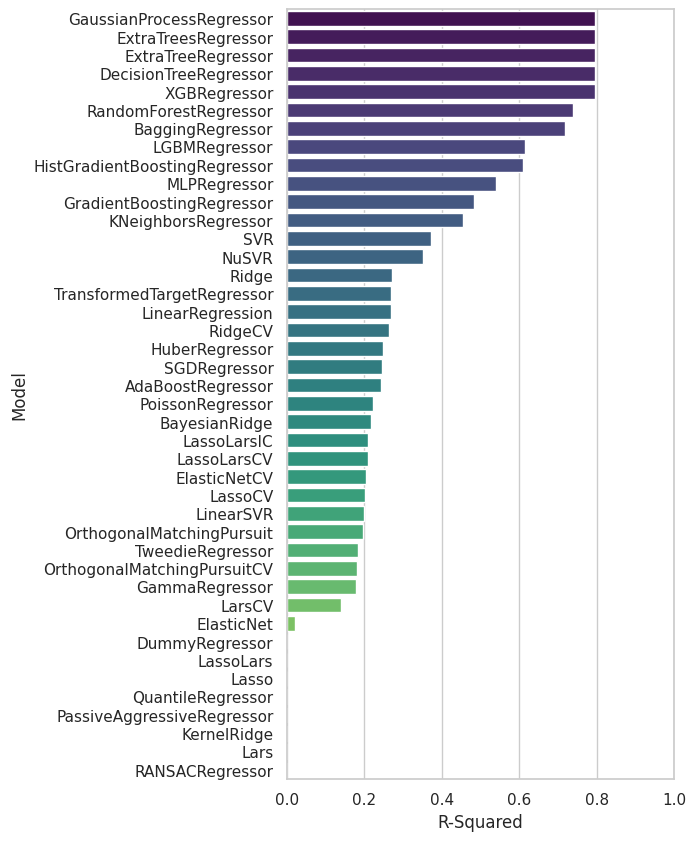

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame predictions_train with R-squared values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")

# Use a color palette for different colors
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train, palette="viridis")

ax.set(xlim=(0, 1))

[(0.0, 10.0)]

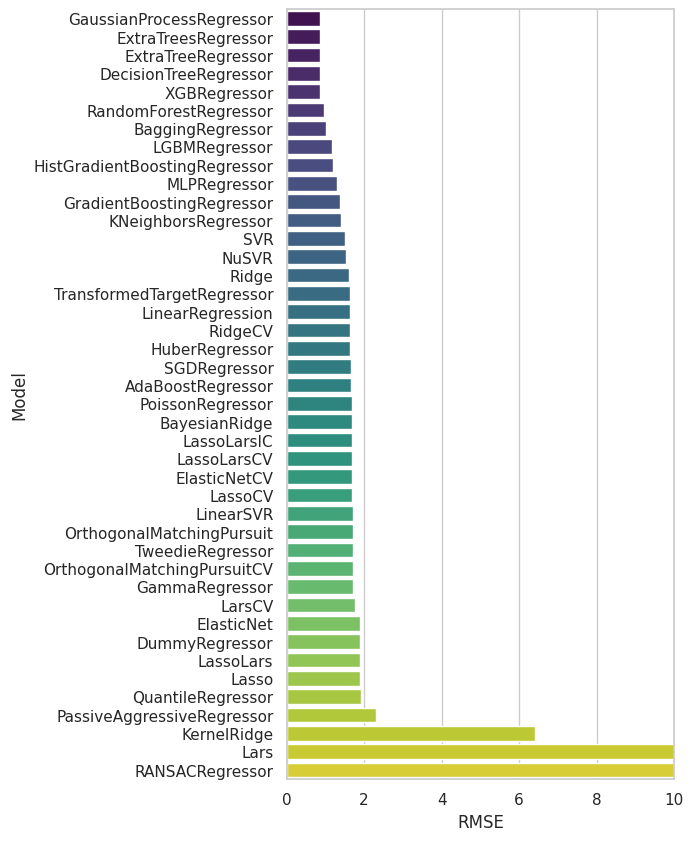

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame `predictions_train` with RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")

# Use a color palette for different colors
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train, palette="viridis")

# Set the x-axis limit to (0, 10) as per your request
ax.set(xlim=(0, 10))


[(0.0, 10.0)]

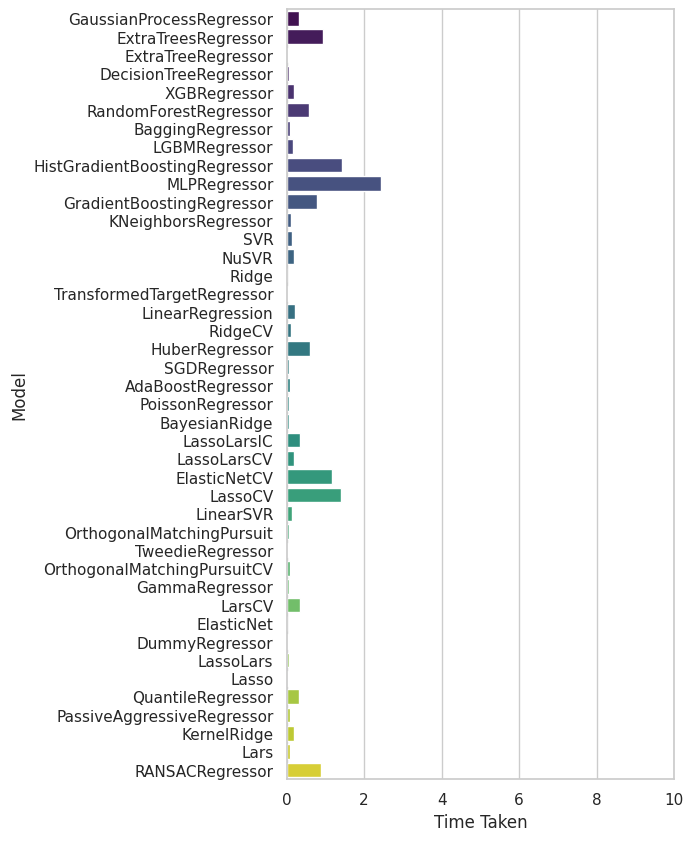

In [19]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame `predictions_train` with 'Time Taken' values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")

# Use a color palette for different colors
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train, palette="viridis")

# Set the x-axis limit to (0, 10) as per your request
ax.set(xlim=(0, 10))

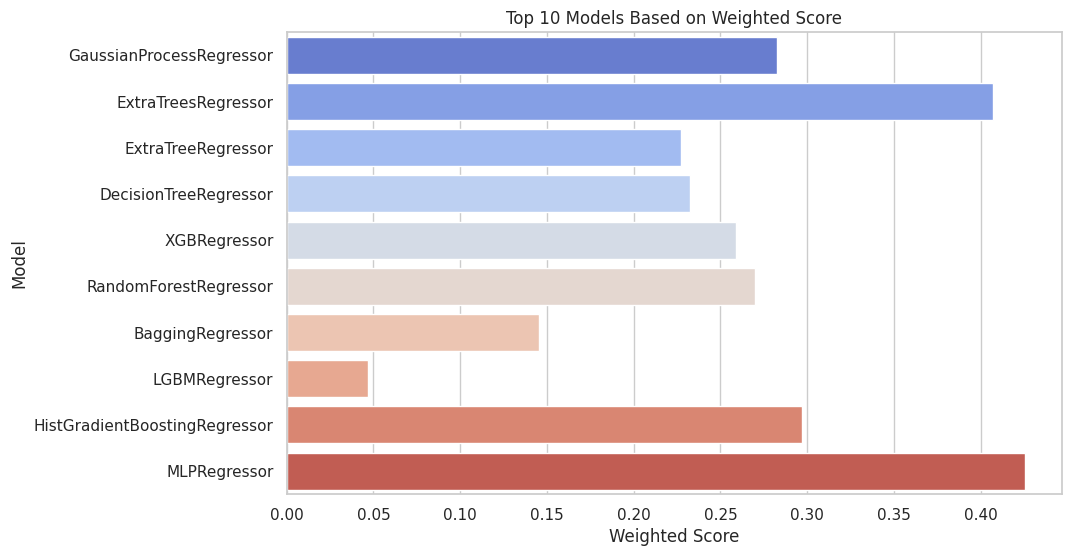

Top 10 Models:
                            Model  R-Squared  RMSE  Time Taken
1        GaussianProcessRegressor       0.80  0.86        0.31
2             ExtraTreesRegressor       0.80  0.86        0.93
3              ExtraTreeRegressor       0.80  0.86        0.03
4           DecisionTreeRegressor       0.80  0.86        0.06
5                    XGBRegressor       0.80  0.86        0.20
6           RandomForestRegressor       0.74  0.97        0.59
7                BaggingRegressor       0.72  1.01        0.08
8                   LGBMRegressor       0.61  1.18        0.16
9   HistGradientBoostingRegressor       0.61  1.19        1.43
10                   MLPRegressor       0.54  1.29        2.44


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'predictions_train' is your DataFrame with the necessary columns
# Rank models based on weighted scores (you can adjust weights based on your priority)
weights = {'R-Squared': 0.6, 'RMSE': -0.3, 'Time Taken': 0.2 }

# Calculate weighted score for each model
predictions_train['Weighted Score'] = (
    weights['R-Squared'] * predictions_train['R-Squared'] +
    weights['RMSE'] * predictions_train['RMSE'] +
    weights['Time Taken'] * predictions_train['Time Taken']
)

# Select top 10 models based on weighted score
top_models = predictions_train.head(10).reset_index()  # Get the top 10 without sorting

# Plot the ranking with a color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Weighted Score', y='Model', data=top_models, palette='coolwarm')  # Choose color palette here
plt.title('Top 10 Models Based on Weighted Score')
plt.xlabel('Weighted Score')
plt.ylabel('Model')
plt.show()

# Display the details of top models
top_models.index = top_models.index + 1
print("Top 10 Models:")
print(top_models[['Model', 'R-Squared', 'RMSE', 'Time Taken']])


In [27]:
print(top_models)

                            Model  Adjusted R-Squared  R-Squared  RMSE  \
1        GaussianProcessRegressor                0.76       0.80  0.86   
2             ExtraTreesRegressor                0.76       0.80  0.86   
3              ExtraTreeRegressor                0.76       0.80  0.86   
4           DecisionTreeRegressor                0.76       0.80  0.86   
5                    XGBRegressor                0.76       0.80  0.86   
6           RandomForestRegressor                0.70       0.74  0.97   
7                BaggingRegressor                0.67       0.72  1.01   
8                   LGBMRegressor                0.55       0.61  1.18   
9   HistGradientBoostingRegressor                0.55       0.61  1.19   
10                   MLPRegressor                0.47       0.54  1.29   

    Time Taken  Weighted Score  
1         0.31            0.28  
2         0.93            0.41  
3         0.03            0.23  
4         0.06            0.23  
5         0.20      